<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2004%20%3A%20Convolutional%20Neural%20Networks/04_fashion_mnist_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FASHION MNIST CNN MODEL**

IMPORT LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

LOAD THE DATA

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
## standardize the training and testing data.
train_images, test_images = train_images / 255, test_images / 255

print("Training Images Shape :--", train_images.shape)
print("Training Labels Shape :--", train_labels.shape)
print("Testing Images Shape :--", test_images.shape)
print("Testing Labels Shape :--", test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
Training Images Shape :-- (60000, 28, 28)
Training Labels Shape :-- (60000,)
Testing Images Shape :-- (10000, 28, 28)
Testing Labels Shape :-- (10000,)


EXPAND THE DIMENSIONS

In [4]:
## cnn expects the shape [N x H x W x C]
## so expanding the dimensions.
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

print("Training Images Shape :--", train_images.shape)
print("Testing Images Shape :--", test_images.shape)

Training Images Shape :-- (60000, 28, 28, 1)
Testing Images Shape :-- (10000, 28, 28, 1)


CHECK FOR THE NUMBER OF CLASSES

In [5]:
k = len(set(train_labels))
print("Number of Classes :--", k)

Number of Classes :-- 10


BUILD THE MODEL

In [6]:
from keras.api._v2.keras import activations
## using the functional API
i = Input(shape = train_images[0].shape)  ## (28, 28, 1)
x = Conv2D(32, (3,3), strides = 2, activation = "relu")(i)
x = Conv2D(64, (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3,3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = "softmax")(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

COMPILE AND FIT THE MODEL

In [7]:
## compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [8]:
## fit the model
r = model.fit(train_images, train_labels,
              validation_data = (test_images, test_labels),
              epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 19s 5ms/step - loss: 0.5221 - accuracy: 0.8056 - val_loss: 0.4026 - val_accuracy: 0.8499
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3606 - accuracy: 0.8643 - val_loss: 0.3418 - val_accuracy: 0.8757
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3101 - accuracy: 0.8827 - val_loss: 0.3183 - val_accuracy: 0.8873
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2776 - accuracy: 0.8948 - val_loss: 0.3107 - val_accuracy: 0.8885
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2522 - accuracy: 0.9046 - val_loss: 0.2960 - val_accuracy: 0.8927
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2330 - accuracy: 0.9124 - val_loss: 0.2943 - val_accuracy: 0.8948
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2141 - accuracy: 0.9181 - val_loss: 0.3121 - val_accura

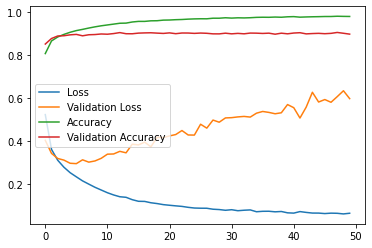

In [9]:
## plotting the loss and accuracy graphs
plt.plot(r.history["loss"], label = "Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();

***